In [1]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/fithicLoop/RG_iPC_eN_iN")

In [2]:
suppressPackageStartupMessages({
    library(dplyr)
    library(Seurat)
    library(clusterProfiler)
    library(ComplexHeatmap)
    library(tidyverse)
    library(venn)
})

In [5]:
xor.ls <- list.files("./",pattern="xor")
both.ls <- list.files("./",pattern="both")
neither.ls <- list.files("./",pattern="neither")

In [7]:
xor.L <- lapply(xor.ls,read.table)
both.L <- lapply(both.ls,read.table)
neither.L <- lapply(neither.ls,read.table)

In [36]:
xor.ls 
both.ls
neither.ls

[1] "eN.xor"  "iN.xor"  "iPC.xor" "RG.xor"

[1] "eN.both"  "iN.both"  "iPC.both" "RG.both"

[1] "eN.neither"  "iN.neither"  "iPC.neither" "RG.neither"

In [37]:
staDF <- rbind(xor.L[[1]] %>% mutate(cell="eN"),
      xor.L[[2]] %>% mutate(cell="iN"),
      xor.L[[3]] %>% mutate(cell="iPC"),
      xor.L[[4]] %>% mutate(cell="RG"),
      both.L[[1]] %>% mutate(cell="eN"),
      both.L[[2]] %>% mutate(cell="iN"),
      both.L[[3]] %>% mutate(cell="iPC"),
      both.L[[4]] %>% mutate(cell="RG"),
      neither.L[[1]] %>% mutate(cell="eN"),
      neither.L[[2]] %>% mutate(cell="iN"),
      neither.L[[3]] %>% mutate(cell="iPC"),
      neither.L[[4]] %>% mutate(cell="RG"))

In [86]:
RG <- staDF %>% filter(cell=="RG") %>% mutate(length=V6-V3) 
eN <- staDF %>% filter(cell=="eN") %>% mutate(length=V6-V3) 
iPC <- staDF %>% filter(cell=="iPC") %>% mutate(length=V6-V3) 
iN <- staDF %>% filter(cell=="iN") %>% mutate(length=V6-V3) 

In [87]:
plotDF2 <- rbind(RG,iPC,eN,iN)

In [55]:
head(plotDF2)

,V1,V2,V3,V4,V5,V6,V7,cell,length
,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,chr10,101600000,101625000,chr10,101775000,101800000,xor,RG,175000
2,chr10,101600000,101625000,chr10,101800000,101825000,xor,RG,200000
3,chr10,102950000,102975000,chr10,103300000,103325000,xor,RG,350000
4,chr10,102950000,102975000,chr10,103500000,103525000,xor,RG,550000
5,chr10,102975000,103000000,chr10,103300000,103325000,xor,RG,325000
6,chr10,103625000,103650000,chr10,103750000,103775000,xor,RG,125000


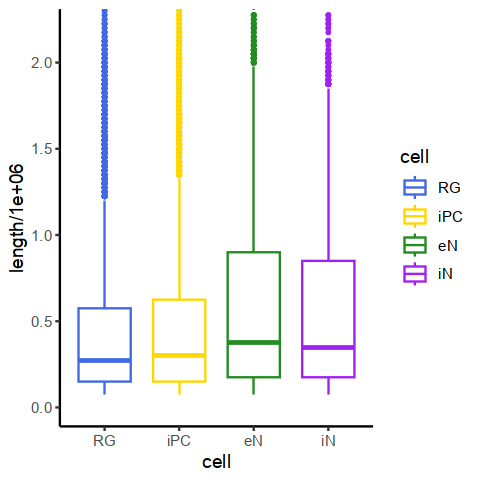

In [99]:
options(repr.plot.width=4,repr.plot.height=4)
ggplot(data = plotDF2 %>% mutate(cell=factor(plotDF2$cell,levels=c("RG","iPC","eN","iN"))),
       aes(x = cell, y = length/1000000, color = cell)) +
  #geom_violin()+
  geom_boxplot(width=0.7,outlier.size = 0.6,
               position = position_dodge(.6))+
  scale_color_manual(values = c("royalblue","gold","forestgreen","purple"))+
coord_cartesian(ylim = c(0,2.2))+
#geom_jitter(size=.1)+
#geom_sina(size=0.01,alpha=1)+
  theme_classic()
ggsave("../../../FINAL_figures/humanBrain_fithicLoops.length.sta.pdf",width=3,height=3)

In [14]:
plotDF <- rbind(xor.L[[1]] %>% mutate(cell="eN"),
      xor.L[[2]] %>% mutate(cell="iN"),
      xor.L[[3]] %>% mutate(cell="iPC"),
      xor.L[[4]] %>% mutate(cell="RG"),
      both.L[[1]] %>% mutate(cell="eN"),
      both.L[[2]] %>% mutate(cell="iN"),
      both.L[[3]] %>% mutate(cell="iPC"),
      both.L[[4]] %>% mutate(cell="RG"),
      neither.L[[1]] %>% mutate(cell="eN"),
      neither.L[[2]] %>% mutate(cell="iN"),
      neither.L[[3]] %>% mutate(cell="iPC"),
      neither.L[[4]] %>% mutate(cell="RG"))%>% group_by(V7,cell) %>%
summarise(N=n())

`summarise()` has grouped output by 'V7'. You can override using the `.groups` argument.


In [27]:
plotDF$V7 <- factor(plotDF$V7,levels=c("both","xor","neither"))
plotDF$cell <- factor(plotDF$cell,levels=c("RG","iPC","eN","iN"))

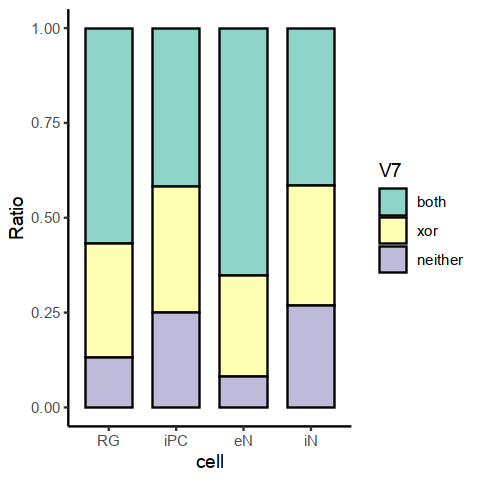

In [35]:
options(repr.plot.width = 4, repr.plot.height = 4)
ggplot(plotDF,
       aes(x = cell, weight = N, fill = V7)) +
  geom_bar(color = "black", width = .7, position = 'fill') +
  labs( y = 'Ratio') +
  scale_fill_brewer(palette = "Set3")+
  #scale_color_manual(values = c("royalblue","gold","forestgreen"))+
#coord_cartesian(ylim = c(0,8))+
#geom_jitter(size=.1)+
#geom_sina(size=0.01,alpha=1)+
  theme_classic()
ggsave("../../../FINAL_figures/humanBrain_fithicLoops.overlappedwithATAC.sta.pdf",width=3,height=3)

# RNA

In [282]:
mm9 <- read.table("/lustre/user/liclab/cuizj/OCEANC2.0/public-data/public_mouse_data/single_cell_data/scRNA-seq/scRNA.data/E14.5_E15.5_RG_IPC_eN_iN_count.txt",header = T)
hg19 <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/publicdata/human_scRNAseq_RG.iPC.eN.avg.psudoExp.txt",header = T)
rhe10 <- read.table("/lustre/user/liclab/cuizj/OCEANC2.0/public-data/public-macaque-brain/from_yt_data/macaque_2rep_subset_RNA_counts.txt",header = T)

In [179]:
library(edgeR)

In [283]:
hg19$symbol <- rownames(hg19)
hg19 <- hg19 %>% mutate(symbol=toupper(symbol))

In [284]:
mm9 <- mm9 %>% mutate(RG=(RG.E14.5+RG.E15.5)/2,
               eN=(eN.E14.5+eN.E15.5)/2,
               symbol=toupper(symbol))

In [285]:
rhe10 <- rhe10 %>% mutate(RG=(RG.rep1+RG.rep2)/2,
               eN=(eN.rep1+eN.rep2)/2)
rhe10$symbol <- rownames(rhe10)

In [286]:
rhe10 <- rhe10[,c(11,9,10)] 
hg19 <- hg19[,c(4,3,1)]
mm9 <- mm9[,c(1,10,11)]

In [287]:
dat <- dplyr::inner_join(hg19,rhe10,by="symbol") %>%
dplyr::inner_join(.,mm9,by="symbol") %>%
replace(is.na(.),0) %>%
set_names("symbol","hRG","heN","rRG","reN","mRG","meN") 

In [288]:
CPM <- cpm(dat[,-1]) %>% as.data.frame()
CPM$symbol <- dat$symbol

In [289]:
eN.sio <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/fithicLoop/RG_eN/eN.SIO.overRG.gene.final.res")
RG.sio <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/fithicLoop/RG_eN/RG.SIO.overeN.gene.final.res")

In [290]:
CPM <- CPM %>% mutate(hmean=(log2(hRG+1) + log2(heN+1))/2,
               rmean=(log2(rRG+1) + log2(reN+1))/2,
               mmean=(log2(mRG+1) + log2(meN+1))/2) %>%
mutate(hRG=log2(hRG+1)-hmean,
       heN=log2(heN+1)-hmean,
       rRG=log2(rRG+1)-rmean,
       reN=log2(reN+1)-rmean,
       mRG=log2(mRG+1)-mmean,
       meN=log2(meN+1)-mmean) %>%
select(-c(hmean,rmean,mmean))

In [348]:
AnnDat <- CPM %>% filter(symbol %in% eN.sio$V8) %>% filter(heN>=-1)%>% 
         arrange(desc(heN)) 

In [350]:
AnnDat$rank <- 1:63

In [359]:
ha <- rowAnnotation(
  foo = anno_mark(
    at =  AnnDat %>% filter(symbol %in% c("KLHL29","SATB2","SLA",
                                          "FTCDNL1","PLCL1","MIAT","MN1")) %>% .$rank, 
    labels = AnnDat %>% filter(symbol %in% c("KLHL29","SATB2","SLA",
                                             "FTCDNL1","PLCL1","MIAT","MN1")) %>% .$symbol)
  )

Warning message:
“The input is a data frame, convert it to the matrix.”
Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


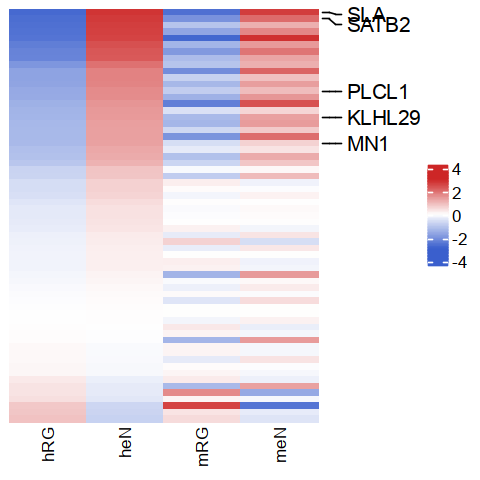

In [381]:
#pdf("../../FINAL_figures/huamnBrain.1k.RG_eN_overbetween.SIO.PE.RNA.heatmap_2.pdf",width=2.8,height=4)
options(repr.plot.width = 4, repr.plot.height = 4)
ComplexHeatmap::pheatmap(CPM %>% filter(symbol %in% eN.sio$V8) %>% filter(heN>=-1) %>% 
         arrange(desc(heN)) %>% select(-symbol,-rRG,-reN),
         breaks=c(-3,3),clustering_method = "complete",
         cluster_cols = F,cluster_rows = F,
         right_annotation = ha,
         col=colorRampPalette(c("royalblue3","white","firebrick3"))(200),
         show_colnames = T,
         border_color = NA
         )
#dev.off()

In [ ]:
plotDF3 <- rbind(CPM %>% filter(symbol %in% eN.sio$V8) %>% 
                select(symbol,hRG) %>% 
                set_names("symbol","enrich")%>%
                mutate(species="human",cell="RG"),
                CPM %>% filter(symbol %in% eN.sio$V8) %>% 
                select(symbol,heN) %>% 
                set_names("symbol","enrich")%>%
                mutate(species="human",cell="eN"),
                 
                CPM %>% filter(symbol %in% eN.sio$V8) %>% 
                select(symbol,rRG) %>% 
                set_names("symbol","enrich")%>%
                mutate(species="rhesus",cell="RG"),
                CPM %>% filter(symbol %in% eN.sio$V8) %>% 
                select(symbol,reN) %>% 
                set_names("symbol","enrich")%>%
                mutate(species="rhesus",cell="eN"),
                 
                CPM %>% filter(symbol %in% eN.sio$V8) %>% 
                select(symbol,mRG) %>% 
                set_names("symbol","enrich")%>%
                mutate(species="mouse",cell="RG"),
                CPM %>% filter(symbol %in% eN.sio$V8) %>% 
                select(symbol,meN) %>% 
                set_names("symbol","enrich")%>%
                mutate(species="mouse",cell="eN"))

In [297]:
plotDF3  <- plotDF3 %>% mutate(species=factor(plotDF3$species,levels=c("human","rhesus","mouse")),
                                 cell=factor(plotDF3$cell,levels=c("RG","eN")))

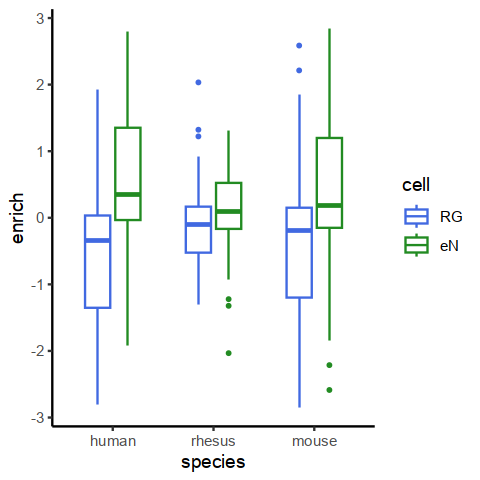

In [308]:
ggplot(data = plotDF3,
       aes(x = species, y = enrich, color = cell)) +
  #geom_violin()+
  geom_boxplot(width=0.5,outlier.size = 0.6,
               position = position_dodge(.6))+
  scale_color_manual(values = c("royalblue","forestgreen"))+
#coord_cartesian(ylim = c(0,1000))+
#geom_jitter(size=.05)+
#geom_sina(size=0.01,alpha=1)+
  theme_classic()
ggsave("../../../FINAL_figures/humanBrain_fithicLoops.dynamicSIOexp.HumanResusMuse.boxlot.pdf",width=3,height=3)

In [299]:
wilcox.test(plotDF3 %>%filter(species=="human",cell=="RG") %>% .$enrich,
            plotDF3 %>%filter(species=="human",cell=="eN") %>% .$enrich,
            alternative = "less")
wilcox.test(plotDF3 %>%filter(species=="rhesus",cell=="RG") %>% .$enrich,
            plotDF3 %>%filter(species=="rhesus",cell=="eN") %>% .$enrich,
            alternative = "less")
wilcox.test(plotDF3 %>%filter(species=="mouse",cell=="RG") %>% .$enrich,
            plotDF3 %>%filter(species=="mouse",cell=="eN") %>% .$enrich,
            alternative = "less")


	Wilcoxon rank sum test with continuity correction

data:  plotDF3 %>% filter(species == "human", cell == "RG") %>% .$enrich and plotDF3 %>% filter(species == "human", cell == "eN") %>% .$enrich
W = 959, p-value = 5.386e-09
alternative hypothesis: true location shift is less than 0



	Wilcoxon rank sum test with continuity correction

data:  plotDF3 %>% filter(species == "rhesus", cell == "RG") %>% .$enrich and plotDF3 %>% filter(species == "rhesus", cell == "eN") %>% .$enrich
W = 1667, p-value = 0.00512
alternative hypothesis: true location shift is less than 0



	Wilcoxon rank sum test with continuity correction

data:  plotDF3 %>% filter(species == "mouse", cell == "RG") %>% .$enrich and plotDF3 %>% filter(species == "mouse", cell == "eN") %>% .$enrich
W = 1254.5, p-value = 5.329e-06
alternative hypothesis: true location shift is less than 0


In [300]:
wilcox.test(plotDF3 %>%filter(species=="human",cell=="RG") %>% .$enrich,
            plotDF3 %>%filter(species=="mouse",cell=="RG") %>% .$enrich,
            alternative = "greater")
wilcox.test(plotDF3 %>%filter(species=="human",cell=="eN") %>% .$enrich,
            plotDF3 %>%filter(species=="mouse",cell=="eN") %>% .$enrich,
            alternative = "greater")
wilcox.test(plotDF3 %>%filter(species=="human",cell=="RG") %>% .$enrich,
            plotDF3 %>%filter(species=="rhesus",cell=="RG") %>% .$enrich,
            alternative = "greater")
wilcox.test(plotDF3 %>%filter(species=="human",cell=="eN") %>% .$enrich,
            plotDF3 %>%filter(species=="rhesus",cell=="eN") %>% .$enrich,
            alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  plotDF3 %>% filter(species == "human", cell == "RG") %>% .$enrich and plotDF3 %>% filter(species == "mouse", cell == "RG") %>% .$enrich
W = 2017, p-value = 0.8448
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  plotDF3 %>% filter(species == "human", cell == "eN") %>% .$enrich and plotDF3 %>% filter(species == "mouse", cell == "eN") %>% .$enrich
W = 2472, p-value = 0.1562
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  plotDF3 %>% filter(species == "human", cell == "RG") %>% .$enrich and plotDF3 %>% filter(species == "rhesus", cell == "RG") %>% .$enrich
W = 1633, p-value = 0.9968
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  plotDF3 %>% filter(species == "human", cell == "eN") %>% .$enrich and plotDF3 %>% filter(species == "rhesus", cell == "eN") %>% .$enrich
W = 2856, p-value = 0.003275
alternative hypothesis: true location shift is greater than 0
